In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [24]:
heartData = pd.read_csv('framingham.csv')
heartData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
# Information about the Variables
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: xlabel='sysBP'>

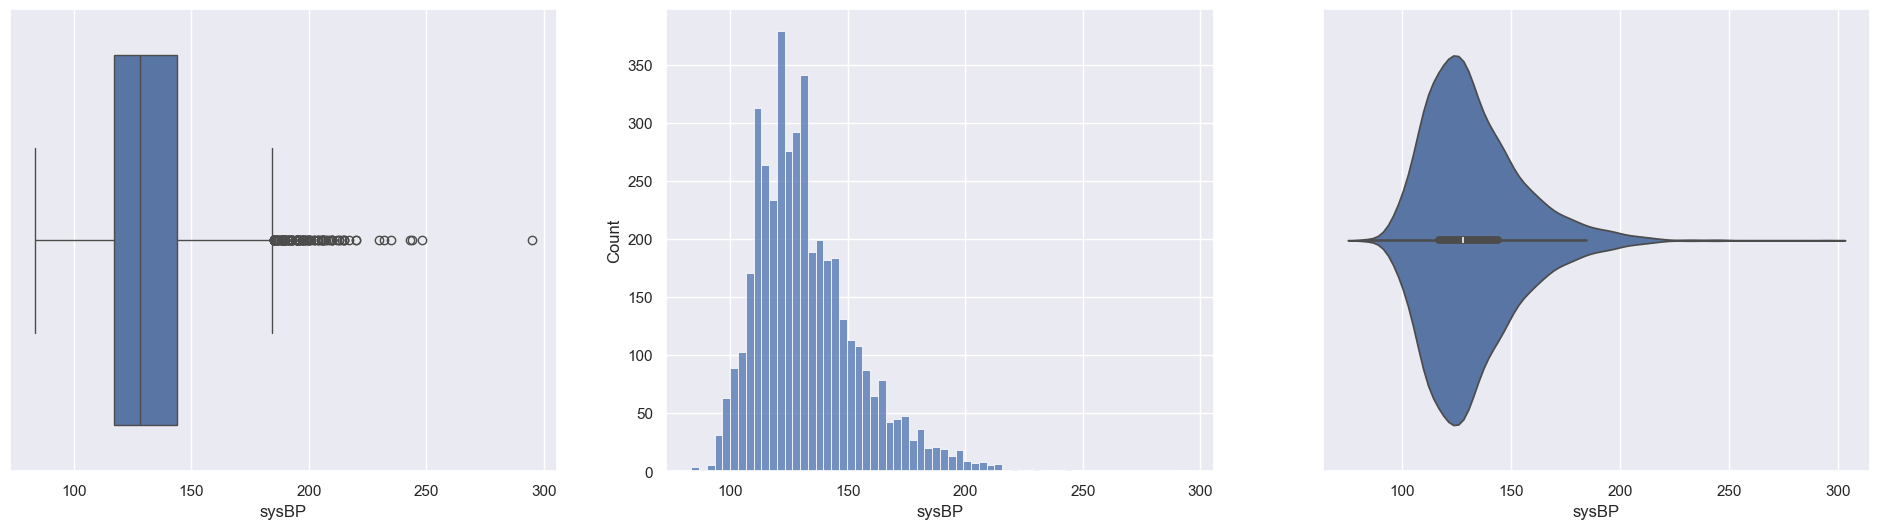

In [26]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 6))
bp_df = heartData['sysBP']
sb.boxplot(data = bp_df, orient = "h", ax = axes[0])
sb.histplot(data = bp_df, ax = axes[1])
sb.violinplot(data = bp_df, orient = "h", ax = axes[2])

<Axes: xlabel='age'>

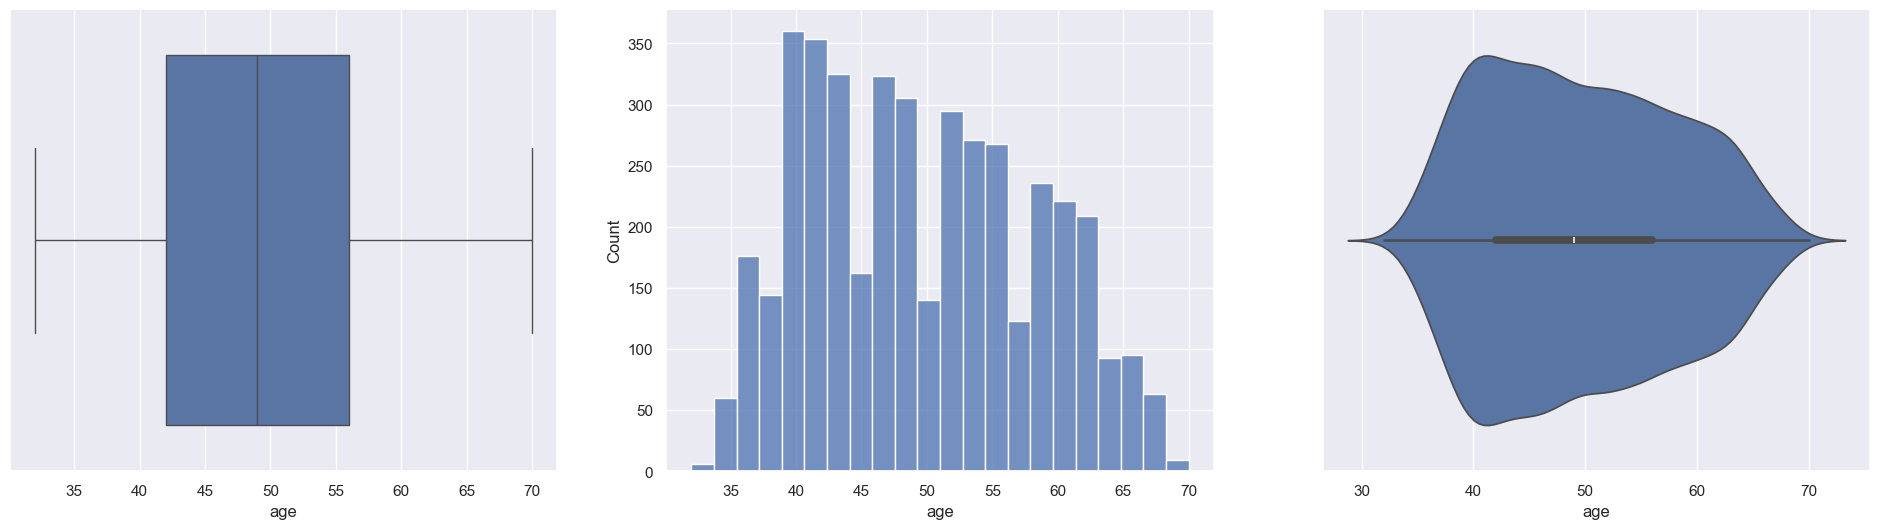

In [27]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 6))
age_df = heartData['age']
sb.boxplot(data = age_df, orient = "h", ax = axes[0])
sb.histplot(data = age_df, ax = axes[1])
sb.violinplot(data = age_df, orient = "h", ax = axes[2])

<Axes: xlabel='totChol'>

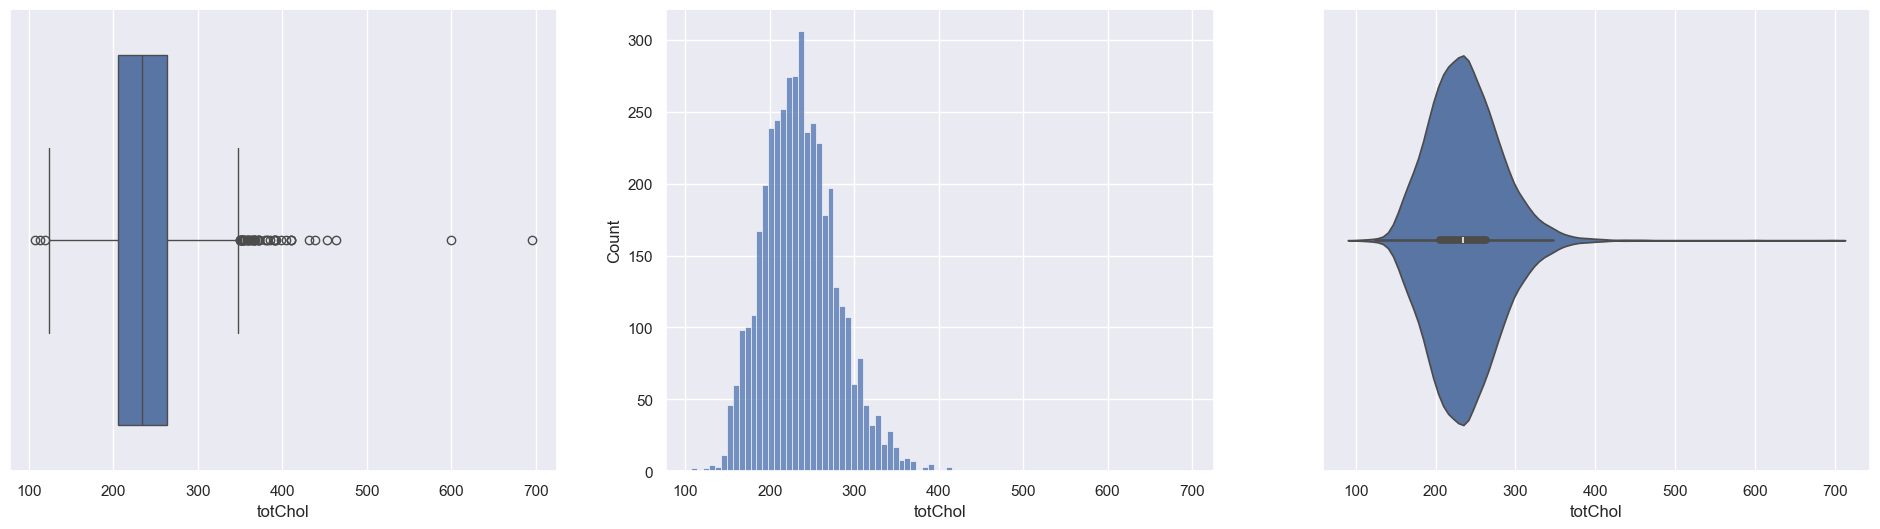

In [28]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 6))
chol_df = heartData['totChol']
sb.boxplot(data = chol_df, orient = "h", ax = axes[0])
sb.histplot(data = chol_df, ax = axes[1])
sb.violinplot(data = chol_df, orient = "h", ax = axes[2])

In [59]:
target_df = heartData['prevalentStroke']

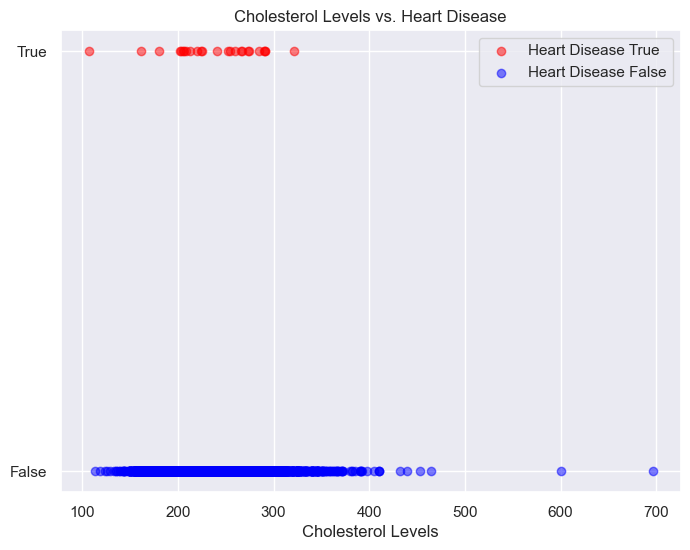

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(chol_df[target_df == 1], target_df[target_df == 1], color='red', label='Heart Disease True', alpha=0.5)
plt.scatter(chol_df[target_df == 0], target_df[target_df == 0], color='blue', label='Heart Disease False', alpha=0.5)

# Labels and title
plt.xlabel('Cholesterol Levels')
plt.yticks([0, 1], ['False', 'True'])
plt.title('Cholesterol Levels vs. Heart Disease')
plt.legend()

# Show plot
plt.show()

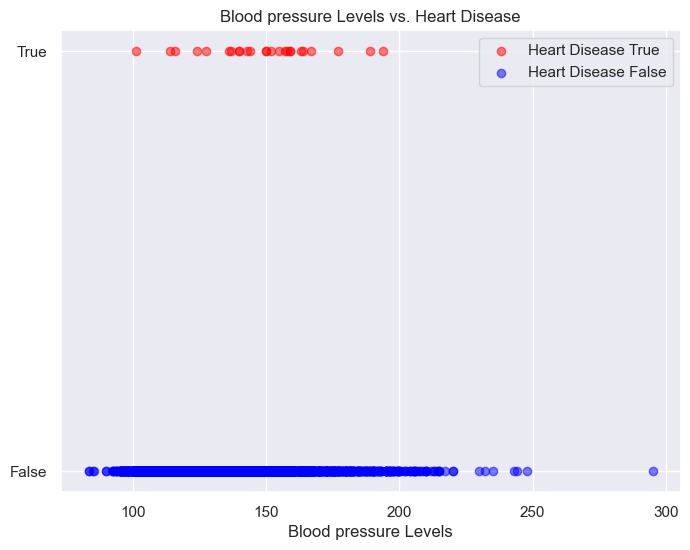

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(bp_df[target_df == 1], target_df[target_df == 1], color='red', label='Heart Disease True', alpha=0.5)
plt.scatter(bp_df[target_df == 0], target_df[target_df == 0], color='blue', label='Heart Disease False', alpha=0.5)

# Labels and title
plt.xlabel('Blood pressure Levels')
plt.yticks([0, 1], ['False', 'True'])
plt.title('Blood pressure Levels vs. Heart Disease')
plt.legend()

# Show plot
plt.show()

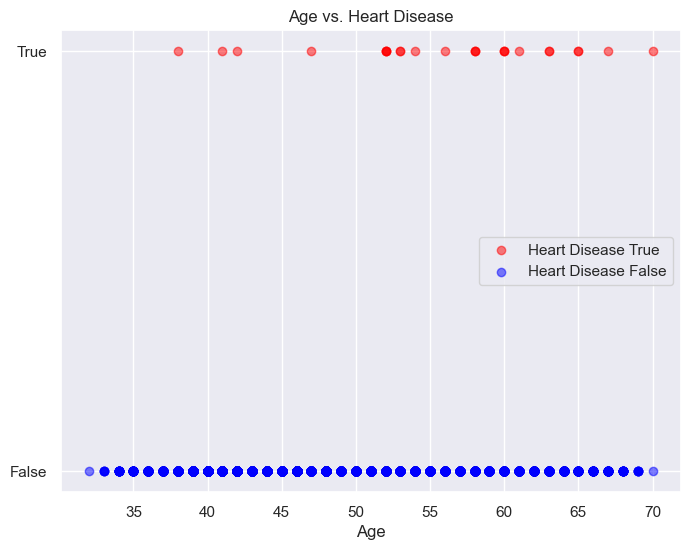

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(age_df[target_df == 1], target_df[target_df == 1], color='red', label='Heart Disease True', alpha=0.5)
plt.scatter(age_df[target_df == 0], target_df[target_df == 0], color='blue', label='Heart Disease False', alpha=0.5)

# Labels and title
plt.xlabel('Age')
plt.yticks([0, 1], ['False', 'True'])
plt.title('Age vs. Heart Disease')
plt.legend()

# Show plot
plt.show()

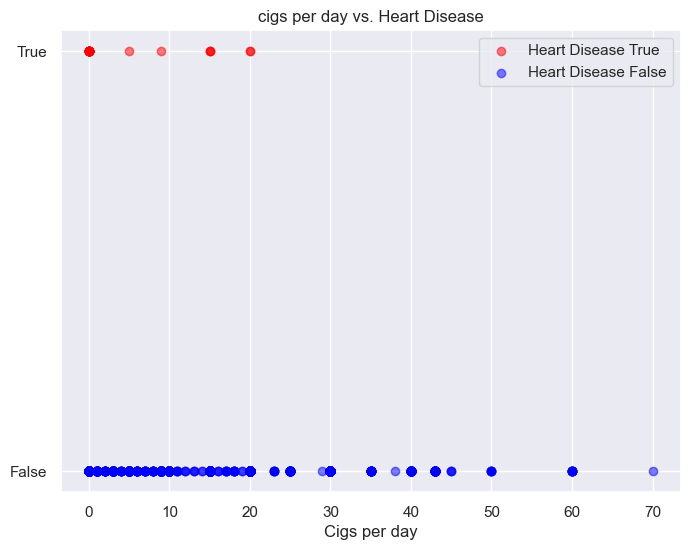

In [61]:
cigs = heartData['cigsPerDay']
plt.figure(figsize=(8, 6))
plt.scatter(cigs[target_df == 1], target_df[target_df == 1], color='red', label='Heart Disease True', alpha=0.5)
plt.scatter(cigs[target_df == 0], target_df[target_df == 0], color='blue', label='Heart Disease False', alpha=0.5)

# Labels and title
plt.xlabel('Cigs per day')
plt.yticks([0, 1], ['False', 'True'])
plt.title('cigs per day vs. Heart Disease')
plt.legend()

# Show plot
plt.show()

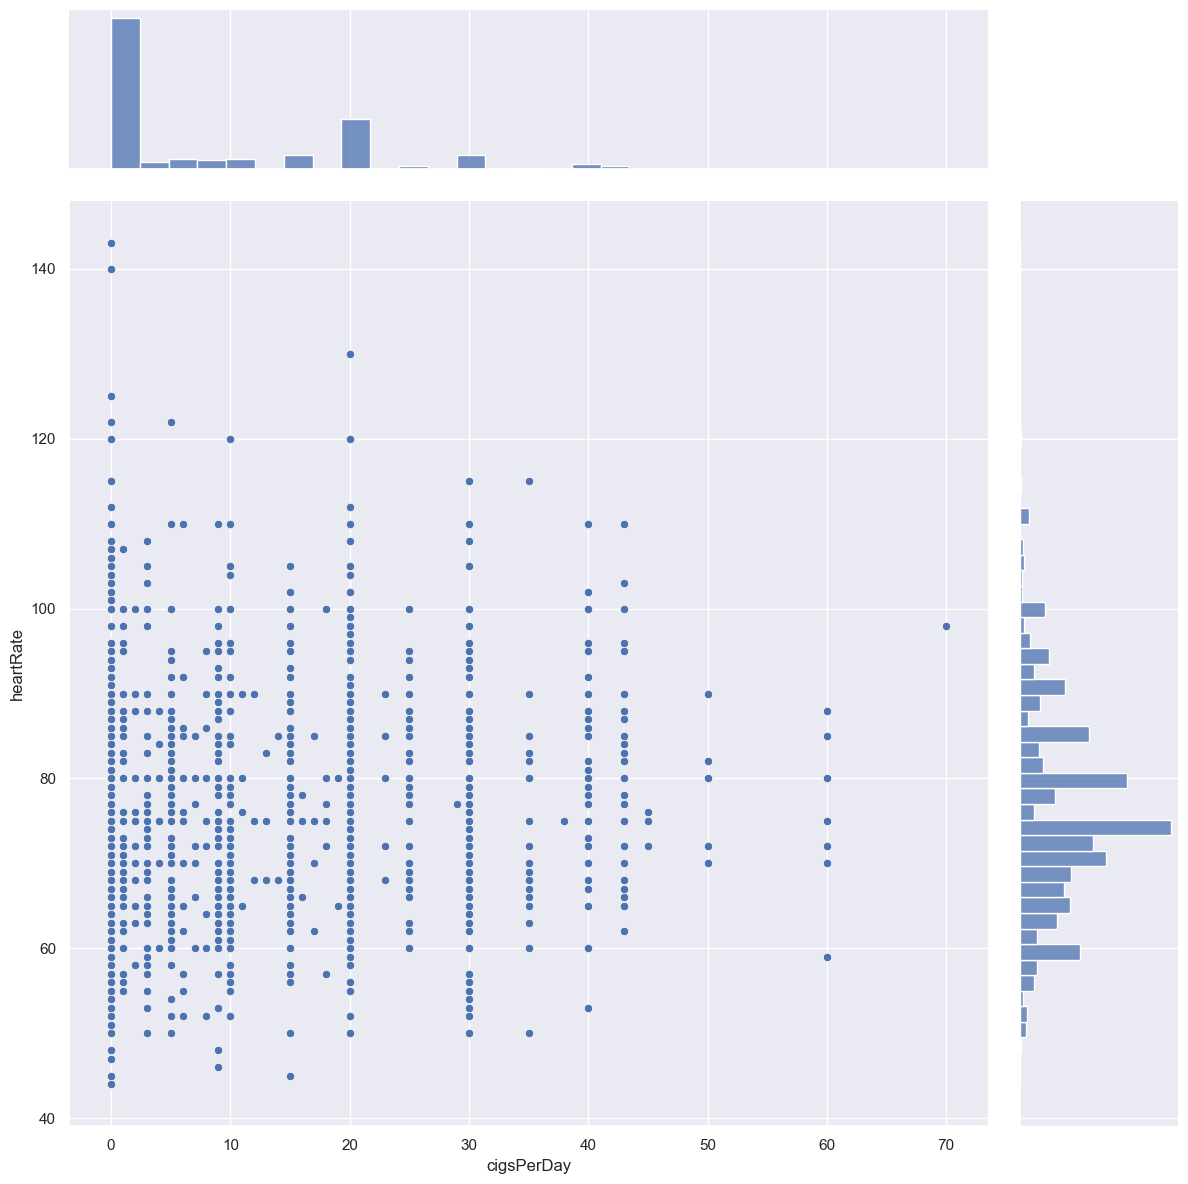

In [66]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([cigs, heartData['heartRate']], axis = 1).reindex(cigs.index)
sb.jointplot(data = jointDF, x = "cigsPerDay", y = "heartRate", height = 12)